In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Flatten,Dropout
import matplotlib.pyplot as plt
from keras.applications import VGG16,InceptionV3,ResNet50
from keras.optimizers import Adam

In [2]:
train_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Machine Vision\Senminar\Week5 Seminar\MV_Seminar Week 5\data_mv\train'
test_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Machine Vision\Senminar\Week5 Seminar\MV_Seminar Week 5\data_mv\test'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)



In [3]:

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size = 4
)

# validation_gen = train.flow_from_directory(
#     train_dir,
#     target_size = (128, 128),
#     batch_size = 4
#     validation_split = 0.1
# )

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size = 4,
    
)

Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [4]:
x_train, y_train = train_gen.next()
x_test, y_test =test_gen.next()

In [5]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

In [6]:
#Adding Customized Layer
x = Flatten()(base_model.output)
# x = Dropout(0.5)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense()
# x = Dropout(0.5)(x)
output_layer = Dense(3, activation = 'softmax')(x)

In [7]:
model = Model(inputs = base_model.input, outputs = output_layer)

In [8]:
# Prevent the weights from being updated by freezing the base layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.8548 - accuracy: 0.6667 - val_loss: 0.1309 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 56ms/step - loss: 1.4522 - accuracy: 0.3333 - val_loss: 1.0437 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 57ms/step - loss: 0.5080 - accuracy: 1.0000 - val_loss: 2.8490 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 56ms/step - loss: 0.7720 - accuracy: 0.6667 - val_loss: 3.2516 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 58ms/step - loss: 0.8189 - accuracy: 0.6667 - val_loss: 2.7443 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 57ms/step - loss: 0.5853 - accuracy: 0.6667 - val_loss: 1.7843 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 0.3795 - accuracy: 0.6667 - val_loss: 1.0824 - val_accuracy: 0.0000e+00
Epoch

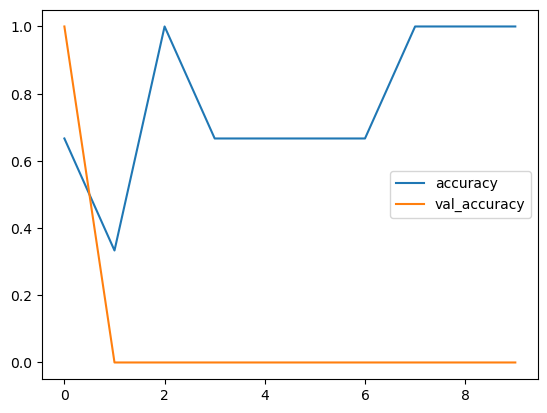

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

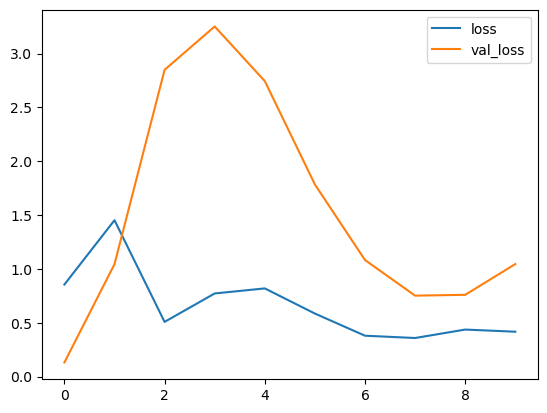

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model

#You need to install numba using 'pip install numba'

from numba import cuda

cuda.select_device(0)
cuda.close()